# Load Libraries and Clean Dataframes

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
airbnb_premodel_df = pd.read_csv("cleaned_data/airbnb_data_clean.csv", index_col=0)

In [3]:
zillow_premodel_df = pd.read_csv("cleaned_data/zillow_data_clean.csv", index_col=0)

In [4]:
airbnb_premodel_df.head()

,last_scraped,id,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2015-10-03,5795487,30066816,f,District 1,37080.0,36.274038,-86.910077,House,Entire home/apt,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.0,3.52
1,2015-10-03,8082102,55304,f,District 1,37189.0,36.259632,-86.870691,House,Private room,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.0,2.10
2,2015-10-03,2480117,3155867,f,District 1,37218.0,36.217547,-86.843971,House,Private room,...,83.0,8.0,8.0,9.0,9.0,8.0,9.0,t,2.0,3.34
3,2015-10-03,8291271,1356379,f,District 1,37218.0,36.212933,-86.853004,House,Private room,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.0,2.10
4,2015-10-03,997187,5479170,f,District 1,37218.0,36.221009,-86.873935,House,Private room,...,100.0,8.0,10.0,10.0,10.0,10.0,10.0,f,1.0,0.15


In [5]:
zillow_premodel_df.head()

,37013,37211,37064,37027,37221,37209,37076,37115,37207,37214,...,37069,37073,37218,37080,37220,37219,37143,37189,37201,37026
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,185356.0,278097.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,...,224206.0,97999.0,96715.0,100882.0,185197.0,NaN,102606.0,99095.0,NaN,NaN
1996-02-29,110113.0,107099.0,185830.0,278949.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,...,224165.0,98271.0,96743.0,100959.0,185138.0,NaN,102595.0,99161.0,NaN,NaN
1996-03-31,110502.0,107465.0,186363.0,280102.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,...,224813.0,98600.0,96824.0,101073.0,185521.0,NaN,102631.0,99564.0,NaN,NaN
1996-04-30,111295.0,108224.0,187234.0,282052.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,...,225632.0,99234.0,97066.0,101279.0,186392.0,NaN,102838.0,99833.0,NaN,NaN
1996-05-31,112128.0,108963.0,188162.0,283765.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,...,227047.0,99774.0,97800.0,101650.0,187482.0,NaN,103283.0,100366.0,NaN,NaN


# Further Clean Airbnb Data

## One-hot encode categorical variables

In [6]:
airbnb_premodel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 0 to 233410
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   last_scraped                    233369 non-null  object 
 1   id                              233369 non-null  int64  
 2   host_id                         233369 non-null  int64  
 3   host_is_superhost               233369 non-null  object 
 4   neighbourhood_cleansed          233369 non-null  object 
 5   zipcode                         233369 non-null  float64
 6   latitude                        233369 non-null  float64
 7   longitude                       233369 non-null  float64
 8   property_type                   233369 non-null  object 
 9   room_type                       233369 non-null  object 
 10  accommodates                    233369 non-null  int64  
 11  bathrooms                       233369 non-null  float64
 12  beds            

- **id** - to be dropped before modeling.
- **host_id** - to be used to create host listing count
- **host_is_superhost** - convert to binary
- **neighbourhood** - one hot encode
- **property type** - one hot encode
- **room type** - one hot encode
- **instant bookable** - convert to binary

### Binarize host_is_superhost and instant_bookable

In [7]:
binary_dict = {'f':0, 't':1}

airbnb_premodel_df['host_is_superhost'] = airbnb_premodel_df['host_is_superhost'].map(binary_dict)
airbnb_premodel_df['instant_bookable'] = airbnb_premodel_df['instant_bookable'].map(binary_dict)
airbnb_premodel_df.head()

,last_scraped,id,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2015-10-03,5795487,30066816,0,District 1,37080.0,36.274038,-86.910077,House,Entire home/apt,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,3.52
1,2015-10-03,8082102,55304,0,District 1,37189.0,36.259632,-86.870691,House,Private room,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,2.10
2,2015-10-03,2480117,3155867,0,District 1,37218.0,36.217547,-86.843971,House,Private room,...,83.0,8.0,8.0,9.0,9.0,8.0,9.0,1,2.0,3.34
3,2015-10-03,8291271,1356379,0,District 1,37218.0,36.212933,-86.853004,House,Private room,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,2.10
4,2015-10-03,997187,5479170,0,District 1,37218.0,36.221009,-86.873935,House,Private room,...,100.0,8.0,10.0,10.0,10.0,10.0,10.0,0,1.0,0.15


### Create Categories for Neighborhood

In [8]:
# update districts to int for easier mapping
airbnb_premodel_df['neighbourhood_cleansed'] = airbnb_premodel_df['neighbourhood_cleansed'].apply(lambda x: x.split()[1]).astype(int)

In [9]:
airbnb_premodel_df['neighbourhood_cleansed']

0          1
1          1
2          1
3          1
4          1
          ..
233406    19
233407     5
233408    19
233409     6
233410    21
Name: neighbourhood_cleansed, Length: 233369, dtype: int32

In [10]:
district_dict = {}

district_dict = dict.fromkeys([1],'Whites_Creek')
district_dict.update(dict.fromkeys([2,21], 'North_Nashville'))
district_dict.update(dict.fromkeys([3], 'Parkwood'))
district_dict.update(dict.fromkeys([4,26,27,30,31], 'Southeast_Nashville'))
district_dict.update(dict.fromkeys([5,6,7,8], 'East_Nashville'))
district_dict.update(dict.fromkeys([9,10], 'Madison'))
district_dict.update(dict.fromkeys([11,12,14,15], 'Donelson'))
district_dict.update(dict.fromkeys([16,17], 'South_Nashville'))
district_dict.update(dict.fromkeys([18,25,34], 'Midtown'))
district_dict.update(dict.fromkeys([19], 'Downtown'))
district_dict.update(dict.fromkeys([20,23,24], 'West_Nashville'))
district_dict.update(dict.fromkeys([22,35], 'Bellevue'))
district_dict.update(dict.fromkeys([13,28,29,32,33], 'Antioch'))

In [11]:
district_dict

{1: 'Whites_Creek',
 2: 'North_Nashville',
 21: 'North_Nashville',
 3: 'Parkwood',
 4: 'Southeast_Nashville',
 26: 'Southeast_Nashville',
 27: 'Southeast_Nashville',
 30: 'Southeast_Nashville',
 31: 'Southeast_Nashville',
 5: 'East_Nashville',
 6: 'East_Nashville',
 7: 'East_Nashville',
 8: 'East_Nashville',
 9: 'Madison',
 10: 'Madison',
 11: 'Donelson',
 12: 'Donelson',
 14: 'Donelson',
 15: 'Donelson',
 16: 'South_Nashville',
 17: 'South_Nashville',
 18: 'Midtown',
 25: 'Midtown',
 34: 'Midtown',
 19: 'Downtown',
 20: 'West_Nashville',
 23: 'West_Nashville',
 24: 'West_Nashville',
 22: 'Bellevue',
 35: 'Bellevue',
 13: 'Antioch',
 28: 'Antioch',
 29: 'Antioch',
 32: 'Antioch',
 33: 'Antioch'}

In [12]:
airbnb_premodel_df['neighborhood'] = airbnb_premodel_df['neighbourhood_cleansed'].map(district_dict)

In [13]:
airbnb_premodel_df.drop(columns='neighbourhood_cleansed', inplace=True)

### Convert Property_type into categories

In [14]:
airbnb_premodel_df.property_type.value_counts()

House                       83453
Apartment                   48013
Condominium                 15571
Townhouse                   15067
Entire house                13731
                            ...  
Room in resort                  4
Hut                             3
Private room                    1
Shared room in townhouse        1
Cave                            1
Name: property_type, Length: 90, dtype: int64

In [15]:
def updated_prop_type(x):
    prop_types = ['House', 'Apartment', 'Condominium', 'Townhouse', 'Other']
    if x not in prop_types:
        return 'Other'
    else:
        return x

In [16]:
airbnb_premodel_df['property_type'] = airbnb_premodel_df['property_type'].apply(lambda x: updated_prop_type(x))

In [17]:
airbnb_premodel_df.property_type.value_counts()

House          83453
Other          71265
Apartment      48013
Condominium    15571
Townhouse      15067
Name: property_type, dtype: int64

### Perform get dummies on categoricals

In [18]:
df_cat = airbnb_premodel_df[['property_type','room_type','neighborhood']]

In [19]:
dummies_df = pd.get_dummies(df_cat, drop_first=True)

In [20]:
airbnb_model_df = pd.concat([airbnb_premodel_df,dummies_df], axis=1)
airbnb_model_df.drop(columns=['property_type','room_type','neighborhood'], inplace=True)

In [21]:
airbnb_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 0 to 233410
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   last_scraped                      233369 non-null  object 
 1   id                                233369 non-null  int64  
 2   host_id                           233369 non-null  int64  
 3   host_is_superhost                 233369 non-null  int64  
 4   zipcode                           233369 non-null  float64
 5   latitude                          233369 non-null  float64
 6   longitude                         233369 non-null  float64
 7   accommodates                      233369 non-null  int64  
 8   bathrooms                         233369 non-null  float64
 9   beds                              233369 non-null  float64
 10  price                             233369 non-null  float64
 11  minimum_nights                    233369 non-null  f

## Feature Engineering

### Add Monthly Reviews Column

In [22]:
airbnb_model_df['id_count'] = airbnb_model_df.groupby('id').cumcount()+1

airbnb_model_df.sort_values(by=['id','last_scraped',], ascending=True, inplace=True)

airbnb_model_df['monthly_reviews'] = airbnb_model_df['number_of_reviews'].diff()

airbnb_model_df.loc[airbnb_model_df['id_count']==1,'monthly_reviews']= np.nan

#airbnb_model_df['monthly_reviews'] = airbnb_model_df['monthly_reviews'].fillna(airbnb_model_df['number_of_reviews'])
airbnb_model_df['monthly_reviews'] = airbnb_model_df['monthly_reviews'].fillna(airbnb_model_df['reviews_per_month'])

airbnb_model_df

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,id_count,monthly_reviews
151947,2015-06-29,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,0,0,25,4.88
87,2015-10-03,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,0,0,1,2.79
205880,2016-09-06,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,0,0,34,90.00
209372,2017-09-14,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,0,0,35,90.00
113349,2018-04-14,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,3.0,...,0,0,0,0,0,0,0,0,19,54.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99586,2021-02-20,48207668,368944610,0,37076.0,36.171570,-86.595800,5,1.0,2.0,...,0,0,0,0,0,0,0,0,1,2.10
99587,2021-02-21,48208643,359230893,0,37203.0,36.156640,-86.797640,5,2.0,2.0,...,0,0,1,0,0,0,0,0,1,2.10
99588,2021-02-20,48211893,153902467,0,37209.0,36.145380,-86.824690,2,2.0,2.0,...,0,0,0,0,0,0,1,0,1,2.10
99589,2021-02-20,48224293,368944610,0,37214.0,36.178120,-86.641460,3,1.0,1.0,...,0,0,0,0,0,0,0,0,1,2.10


In [23]:
airbnb_model_df[airbnb_model_df['monthly_reviews']<0]

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,id_count,monthly_reviews
153056,2015-07-01,20847,79021,0,37216.0,36.196397,-86.704267,2,1.0,1.0,...,0,0,0,0,0,0,0,0,20,-577.0
60213,2019-01-17,20847,79021,1,37216.0,36.196397,-86.704267,2,1.0,1.0,...,0,0,0,0,0,0,0,0,8,-1.0
153053,2015-06-30,25341,79021,0,37216.0,36.197076,-86.708020,1,1.0,1.0,...,0,0,0,0,0,0,0,0,19,-94.0
153054,2015-06-30,25342,79021,0,37216.0,36.197577,-86.706568,2,1.0,1.0,...,0,0,0,0,0,0,0,0,19,-103.0
153247,2015-07-01,37306,161033,0,37204.0,36.133109,-86.774767,2,1.0,1.0,...,0,0,0,0,1,0,0,0,17,-423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233403,2020-09-28,45572499,88566861,1,37203.0,36.158000,-86.787130,6,2.0,4.0,...,0,0,0,0,0,0,0,0,6,-10.0
233404,2020-09-28,45572500,88566861,1,37203.0,36.157780,-86.787040,6,2.0,3.0,...,0,0,0,0,0,0,0,0,6,-5.0
233405,2020-09-28,45572502,88566861,1,37203.0,36.157270,-86.786750,2,1.0,1.0,...,0,0,0,0,0,0,0,0,6,-18.0
233406,2020-09-28,45576637,205078166,1,37203.0,36.151960,-86.722620,2,1.0,1.0,...,0,0,0,0,0,0,0,0,6,-2.0


In [24]:
airbnb_model_df['monthly_reviews'].where(airbnb_model_df['monthly_reviews']>0,airbnb_model_df['reviews_per_month'],inplace=True)

In [25]:
airbnb_model_df[airbnb_model_df['monthly_reviews']<0]

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,id_count,monthly_reviews


### Add Occupancy Rate

Based on inside Airbnb's methodology, we assume 50% of bookings result in reviews. We will add a bookings column to our dataset.

In [26]:
airbnb_model_df['reviews_per_month']

151947    4.88
87        2.79
205880    3.44
209372    3.90
113349    4.14
          ... 
99586     2.10
99587     2.10
99588     2.10
99589     2.10
99590     2.10
Name: reviews_per_month, Length: 233369, dtype: float64

In [27]:
# airbnb_model_df['monthly_bookings'] = airbnb_model_df['reviews_per_month']/.50

In [28]:
airbnb_model_df['monthly_bookings'] = airbnb_model_df['monthly_reviews']/.50

Unless there is a minimum number of nights provided, we will assume the national average of 3 nights per booking.

In [29]:
airbnb_model_df['ALOS'] = airbnb_model_df['minimum_nights']

In [30]:
airbnb_model_df.loc[airbnb_model_df['minimum_nights']<3,'ALOS']= 3

In [31]:
airbnb_model_df

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,id_count,monthly_reviews,monthly_bookings,ALOS
151947,2015-06-29,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,25,4.88,9.76,3.0
87,2015-10-03,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,1,2.79,5.58,3.0
205880,2016-09-06,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,34,90.00,180.00,3.0
209372,2017-09-14,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,35,90.00,180.00,3.0
113349,2018-04-14,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,3.0,...,0,0,0,0,0,0,19,54.00,108.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99586,2021-02-20,48207668,368944610,0,37076.0,36.171570,-86.595800,5,1.0,2.0,...,0,0,0,0,0,0,1,2.10,4.20,90.0
99587,2021-02-21,48208643,359230893,0,37203.0,36.156640,-86.797640,5,2.0,2.0,...,1,0,0,0,0,0,1,2.10,4.20,30.0
99588,2021-02-20,48211893,153902467,0,37209.0,36.145380,-86.824690,2,2.0,2.0,...,0,0,0,0,1,0,1,2.10,4.20,30.0
99589,2021-02-20,48224293,368944610,0,37214.0,36.178120,-86.641460,3,1.0,1.0,...,0,0,0,0,0,0,1,2.10,4.20,90.0


In [32]:
# occupancy rate = average length of stay x bookings / time period
airbnb_model_df['occ_rate'] = (airbnb_model_df['ALOS']*airbnb_model_df['monthly_bookings'])/30.416

In [33]:
airbnb_model_df['minimum_nights'].value_counts()

2.0      100770
1.0       96222
3.0       18353
30.0       9882
31.0       2014
4.0        1650
90.0        854
5.0         622
7.0         553
14.0        493
28.0        402
6.0         212
29.0        210
60.0        160
10.0        127
32.0        112
21.0         98
20.0         90
180.0        85
15.0         65
45.0         58
12.0         39
25.0         31
150.0        31
199.0        23
550.0        21
120.0        21
35.0         20
26.0         19
91.0         17
365.0        17
360.0        17
75.0         10
36.0         10
22.0          8
23.0          8
300.0         8
80.0          8
92.0          5
27.0          5
17.0          4
8.0           3
359.0         3
50.0          2
89.0          2
18.0          2
13.0          1
200.0         1
160.0         1
Name: minimum_nights, dtype: int64

In [34]:
airbnb_model_df.occ_rate.value_counts()

0.197265     27750
0.414256     20652
0.394529     20544
0.591794     17013
0.789058     13503
             ...  
11.572856        1
4.851394         1
4.471331         1
5.700947         1
1.186875         1
Name: occ_rate, Length: 2822, dtype: int64

In [35]:
airbnb_model_df.loc[(airbnb_model_df['occ_rate'] >.7),'occ_rate'] = .7

In [36]:
airbnb_model_df.occ_rate.value_counts()

0.700000    71366
0.197265    27750
0.414256    20652
0.394529    20544
0.591794    17013
            ...  
0.516176        1
0.581931        1
0.299842        1
0.282746        1
0.668069        1
Name: occ_rate, Length: 707, dtype: int64

In [37]:
airbnb_model_df.drop(columns=['monthly_bookings','ALOS','id_count','monthly_reviews','reviews_per_month'], inplace=True)

### Add Estimated Monthly Income

In [38]:
avg_days_per_month = 365/12

In [39]:
airbnb_model_df['monthly_income'] = airbnb_model_df['occ_rate']*airbnb_model_df['price']*avg_days_per_month

In [40]:
airbnb_model_df

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income
151947,2015-06-29,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0.700000,745.208333
87,2015-10-03,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0.550368,585.912842
205880,2016-09-06,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,0,0,0.700000,745.208333
209372,2017-09-14,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,0,0,0.700000,745.208333
113349,2018-04-14,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,3.0,...,0,0,0,0,0,0,0,0,0.700000,851.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99586,2021-02-20,48207668,368944610,0,37076.0,36.171570,-86.595800,5,1.0,2.0,...,0,0,0,0,0,0,0,0,0.700000,3151.166667
99587,2021-02-21,48208643,359230893,0,37203.0,36.156640,-86.797640,5,2.0,2.0,...,0,0,1,0,0,0,0,0,0.700000,2959.541667
99588,2021-02-20,48211893,153902467,0,37209.0,36.145380,-86.824690,2,2.0,2.0,...,0,0,0,0,0,0,1,0,0.700000,1022.000000
99589,2021-02-20,48224293,368944610,0,37214.0,36.178120,-86.641460,3,1.0,1.0,...,0,0,0,0,0,0,0,0,0.700000,2576.291667


In [41]:
airbnb_model_df['monthly_income'].describe()

count    233369.000000
mean       2856.532679
std        6056.050180
min           0.000000
25%         954.020910
50%        1824.039979
75%        3151.166667
max      532291.666667
Name: monthly_income, dtype: float64

In [42]:
airbnb_model_df[airbnb_model_df['monthly_income']==airbnb_model_df['monthly_income'].max()]

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income
77149,2021-01-21,35788694,267913366,0,37214.0,36.14211,-86.70116,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0.7,532291.666667
96820,2021-02-20,35788694,267913366,0,37214.0,36.14211,-86.70116,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0.7,532291.666667
77150,2021-01-21,35789056,267913366,0,37214.0,36.14211,-86.70116,4,1.0,2.0,...,0,0,0,0,0,0,0,0,0.7,532291.666667
96821,2021-02-20,35789056,267913366,0,37214.0,36.14211,-86.70116,4,1.0,2.0,...,0,0,0,0,0,0,0,0,0.7,532291.666667
77152,2021-01-21,35789214,267913366,0,37214.0,36.14211,-86.70116,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0.7,532291.666667
96823,2021-02-20,35789214,267913366,0,37214.0,36.14211,-86.70116,2,1.0,1.0,...,0,0,0,0,0,0,0,0,0.7,532291.666667


### Add Multi-listing host

To simplify the model, replace host_listings_count with multi-listing host, which labels whether or not the host has multiple locations.

In [43]:
airbnb_model_df['multi_listing_host'] = np.where(airbnb_model_df['calculated_host_listings_count'] > 1, 1,0)

In [44]:
airbnb_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 151947 to 99590
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   last_scraped                      233369 non-null  object 
 1   id                                233369 non-null  int64  
 2   host_id                           233369 non-null  int64  
 3   host_is_superhost                 233369 non-null  int64  
 4   zipcode                           233369 non-null  float64
 5   latitude                          233369 non-null  float64
 6   longitude                         233369 non-null  float64
 7   accommodates                      233369 non-null  int64  
 8   bathrooms                         233369 non-null  float64
 9   beds                              233369 non-null  float64
 10  price                             233369 non-null  float64
 11  minimum_nights                    233369 non-nul

In [69]:
airbnb_premodel_df.to_csv("cleaned_data/airbnb_model_not_encoded.csv")

In [46]:
airbnb_model_df.to_csv("large_clean_data/airbnb_model_data_clean.csv")

## Create Separate Dataframes for each Neighborhood

In [47]:
airbnb_premodel_df.neighborhood.value_counts()

East_Nashville         57168
Downtown               56302
South_Nashville        31846
North_Nashville        23139
Midtown                15419
West_Nashville         14058
Donelson               13837
Southeast_Nashville     7142
Antioch                 6677
Bellevue                2505
Madison                 2095
Whites_Creek            1919
Parkwood                1262
Name: neighborhood, dtype: int64

In [48]:
east_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='East_Nashville']
downtown_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Downtown']
south_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='South_Nashville']
north_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='North_Nashville']
midtown_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Midtown']
west_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='West_Nashville']
donelson_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Donelson']
southeast_nash_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Southeast_Nashville']
antioch_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Antioch']
bellevue_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Bellevue']
madison_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Madison']
whitescreek_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Whites_Creek']
parkwood_df = airbnb_premodel_df[airbnb_premodel_df['neighborhood']=='Parkwood']

## Create DataFrame for all current listings

In [55]:
current_listings_not_encoded = airbnb_premodel_df[airbnb_premodel_df['last_scraped']>'2021-02']

In [56]:
current_listings_not_encoded.head()

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,neighborhood
93447,2021-02-20,6422,12172,1,37206.0,36.17315,-86.73581,Other,Private room,2,...,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,4.69,East_Nashville
93448,2021-02-20,25613,95811,1,37206.0,36.17826,-86.74162,Other,Private room,2,...,10.0,10.0,10.0,10.0,10.0,10.0,1,1.0,3.87,East_Nashville
93449,2021-02-20,136015,666322,0,37214.0,36.19464,-86.67195,Other,Entire home/apt,2,...,10.0,10.0,10.0,10.0,10.0,10.0,0,2.0,0.43,Donelson
93450,2021-02-20,258817,22296,1,37076.0,36.16249,-86.58988,Other,Private room,2,...,10.0,9.0,10.0,10.0,9.0,9.0,0,7.0,0.86,Donelson
93451,2021-02-20,289242,22296,1,37076.0,36.16102,-86.59207,Other,Private room,1,...,9.0,8.0,10.0,9.0,9.0,9.0,0,7.0,0.68,Donelson


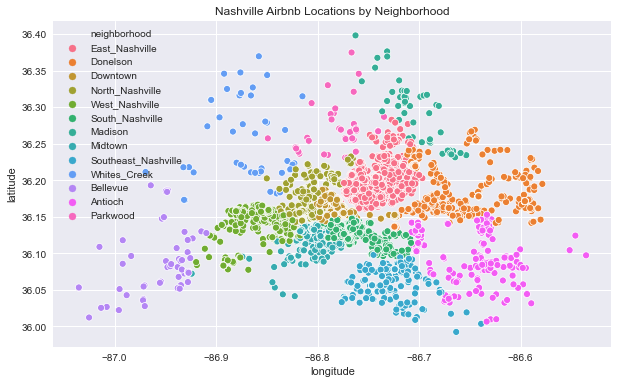

In [57]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=current_listings_not_encoded, x='longitude', y='latitude', hue='neighborhood')
ax.set_title('Nashville Airbnb Locations by Neighborhood')
plt.legend(loc='best');

In [58]:
import plotly.express as px
df = current_listings_not_encoded
fig = px.scatter(df, x="longitude", y="latitude", color="neighborhood",
                  hover_data=['price','room_type'])
fig.show()

In [58]:
# update to use onehot encoded dataframe

In [59]:
airbnb_model_df['last_scraped'] = pd.to_datetime(airbnb_model_df['last_scraped'],format='%Y/%m/%d')

In [60]:
current_listings_df = airbnb_model_df[airbnb_model_df['last_scraped']>'2021-02']

In [61]:
current_listings_df

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
93447,2021-02-20,6422,12172,1,37206.0,36.17315,-86.73581,2,1.0,3.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
93448,2021-02-20,25613,95811,1,37206.0,36.17826,-86.74162,2,1.0,1.0,...,0,0,0,0,0,0,0,0.700000,1596.875000,0
93449,2021-02-20,136015,666322,0,37214.0,36.19464,-86.67195,2,1.0,1.0,...,0,0,0,0,0,0,0,0.700000,2193.041667,1
93450,2021-02-20,258817,22296,1,37076.0,36.16249,-86.58988,2,1.0,2.0,...,0,0,0,0,0,0,0,0.700000,574.875000,1
93451,2021-02-20,289242,22296,1,37076.0,36.16102,-86.59207,1,1.0,3.0,...,0,0,0,0,0,0,0,0.700000,511.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99586,2021-02-20,48207668,368944610,0,37076.0,36.17157,-86.59580,5,1.0,2.0,...,0,0,0,0,0,0,0,0.700000,3151.166667,1
99587,2021-02-21,48208643,359230893,0,37203.0,36.15664,-86.79764,5,2.0,2.0,...,0,1,0,0,0,0,0,0.700000,2959.541667,1
99588,2021-02-20,48211893,153902467,0,37209.0,36.14538,-86.82469,2,2.0,2.0,...,0,0,0,0,0,1,0,0.700000,1022.000000,0
99589,2021-02-20,48224293,368944610,0,37214.0,36.17812,-86.64146,3,1.0,1.0,...,0,0,0,0,0,0,0,0.700000,2576.291667,1


### Add availability metric to current listings

In [62]:
availability_21_df = pd.read_csv('cleaned_data/availability_data.csv',index_col=0)

In [63]:
availability_21_df

,available,minimum_nights,maximum_nights
listing_id,,,
6422,217,9450.0,114975.0
25613,21,630.0,354375.0
136015,140,9450.0,354375.0
258817,314,9450.0,114975.0
289242,314,9450.0,114975.0
...,...,...,...
48207668,247,28350.0,114975.0
48208643,233,9420.0,114610.0
48211893,95,9450.0,28350.0


In [64]:
availability_21_df.drop(columns=['minimum_nights','maximum_nights'],inplace=True)

In [65]:
current_listings_df = current_listings_df.merge(availability_21_df, left_on='id', right_on='listing_id')

In [66]:
current_listings_df

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host,available
0,2021-02-20,6422,12172,1,37206.0,36.17315,-86.73581,2,1.0,3.0,...,0,0,0,0,0,0,0.700000,851.666667,0,217
1,2021-02-20,25613,95811,1,37206.0,36.17826,-86.74162,2,1.0,1.0,...,0,0,0,0,0,0,0.700000,1596.875000,0,21
2,2021-02-20,136015,666322,0,37214.0,36.19464,-86.67195,2,1.0,1.0,...,0,0,0,0,0,0,0.700000,2193.041667,1,140
3,2021-02-20,258817,22296,1,37076.0,36.16249,-86.58988,2,1.0,2.0,...,0,0,0,0,0,0,0.700000,574.875000,1,314
4,2021-02-20,289242,22296,1,37076.0,36.16102,-86.59207,1,1.0,3.0,...,0,0,0,0,0,0,0.700000,511.000000,1,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,2021-02-20,48207668,368944610,0,37076.0,36.17157,-86.59580,5,1.0,2.0,...,0,0,0,0,0,0,0.700000,3151.166667,1,247
6140,2021-02-21,48208643,359230893,0,37203.0,36.15664,-86.79764,5,2.0,2.0,...,1,0,0,0,0,0,0.700000,2959.541667,1,233
6141,2021-02-20,48211893,153902467,0,37209.0,36.14538,-86.82469,2,2.0,2.0,...,0,0,0,0,1,0,0.700000,1022.000000,0,95
6142,2021-02-20,48224293,368944610,0,37214.0,36.17812,-86.64146,3,1.0,1.0,...,0,0,0,0,0,0,0.700000,2576.291667,1,249


In [67]:
current_listings_df.to_csv('cleaned_data/current_listing_availability.csv')

## Create DateTime Index Monthly Dataframe

In [68]:
airbnb_model_df

,last_scraped,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
151947,2015-06-29,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,0,0.700000,745.208333,0
87,2015-10-03,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,1.0,...,0,0,0,0,0,0,0,0.550368,585.912842,0
205880,2016-09-06,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,0,0.700000,745.208333,0
209372,2017-09-14,6422,12172,0,37206.0,36.173151,-86.735813,2,1.0,2.0,...,0,0,0,0,0,0,0,0.700000,745.208333,0
113349,2018-04-14,6422,12172,1,37206.0,36.173151,-86.735813,2,1.0,3.0,...,0,0,0,0,0,0,0,0.700000,851.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99586,2021-02-20,48207668,368944610,0,37076.0,36.171570,-86.595800,5,1.0,2.0,...,0,0,0,0,0,0,0,0.700000,3151.166667,1
99587,2021-02-21,48208643,359230893,0,37203.0,36.156640,-86.797640,5,2.0,2.0,...,0,1,0,0,0,0,0,0.700000,2959.541667,1
99588,2021-02-20,48211893,153902467,0,37209.0,36.145380,-86.824690,2,2.0,2.0,...,0,0,0,0,0,1,0,0.700000,1022.000000,0
99589,2021-02-20,48224293,368944610,0,37214.0,36.178120,-86.641460,3,1.0,1.0,...,0,0,0,0,0,0,0,0.700000,2576.291667,1


In [72]:
airbnb_model_df.set_index('last_scraped', inplace=True)

In [73]:
# resample dataframe on a monthly basis
airbnb_monthly = airbnb_model_df.resample('MS')

In [74]:
# use count as the monthly aggregator
airbnb_monthly_count = airbnb_monthly.count()
airbnb_monthly_count.head()

,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
last_scraped,,,,,,,,,,,,,,,,,,,,,
2015-06-01,121,121,121,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121
2015-07-01,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615,...,1615,1615,1615,1615,1615,1615,1615,1615,1615,1615
2015-08-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-10-01,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,...,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110


In [75]:
# use sum as the monthly aggregator
airbnb_monthly_sum = airbnb_monthly.sum()
airbnb_monthly_sum.head()

,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
last_scraped,,,,,,,,,,,,,,,,,,,,,
2015-06-01,594245872,2235908860,23,4501454.0,4375.591454,-10498.980084,511,175.5,246.0,19737.0,...,10.0,6.0,1.0,15.0,4.0,8.0,3.0,54.944766,2.609111e+05,16
2015-07-01,7405782055,25654950542,286,60081558.0,58393.913730,-140129.214995,7441,2435.0,3729.0,326794.0,...,172.0,49.0,6.0,208.0,63.0,117.0,9.0,728.434561,4.292836e+06,151
2015-08-01,0,0,0,0.0,0.000000,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0
2015-09-01,0,0,0,0.0,0.000000,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0
2015-10-01,11469696350,39200140624,434,78494993.0,76290.349910,-183079.191933,10119,3238.0,5077.0,423106.0,...,236.0,76.0,10.0,260.0,83.0,150.0,23.0,849.520305,4.673226e+06,915


In [76]:
airbnb_monthly_sum.columns

Index(['id', 'host_id', 'host_is_superhost', 'zipcode', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'property_type_Condominium',
       'property_type_House', 'property_type_Other', 'property_type_Townhouse',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'neighborhood_South_Nashvill

In [77]:
# use mean as the monthly aggregator
airbnb_monthly_mean = airbnb_monthly.mean()
airbnb_monthly_mean.head()

,id,host_id,host_is_superhost,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,multi_listing_host
last_scraped,,,,,,,,,,,,,,,,,,,,,
2015-06-01,4.911123e+06,1.847859e+07,0.190083,37202.099174,36.161913,-86.768430,4.223140,1.450413,2.033058,163.115702,...,0.082645,0.049587,0.008264,0.123967,0.033058,0.066116,0.024793,0.454089,2156.290441,0.132231
2015-07-01,4.585624e+06,1.588542e+07,0.177090,37202.203096,36.157222,-86.767316,4.607430,1.507740,2.308978,202.349226,...,0.106502,0.030341,0.003715,0.128793,0.039009,0.072446,0.005573,0.451043,2658.102760,0.093498
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,5.435875e+06,1.857827e+07,0.205687,37201.418483,36.156564,-86.767390,4.795735,1.534597,2.406161,200.524171,...,0.111848,0.036019,0.004739,0.123223,0.039336,0.071090,0.010900,0.402616,2214.798998,0.433649


In [78]:
cat_cols = ['host_is_superhost','multi_listing_host','instant_bookable','neighborhood_Bellevue',
                    'neighborhood_Donelson', 'neighborhood_Downtown',
                    'neighborhood_East_Nashville', 'neighborhood_Madison',
                    'neighborhood_Midtown', 'neighborhood_North_Nashville',
                    'neighborhood_Parkwood', 'neighborhood_South_Nashville',
                    'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
                    'neighborhood_Whites_Creek','property_type_Condominium', 'property_type_House',
                    'property_type_Other', 'property_type_Townhouse','room_type_Hotel room', 
                    'room_type_Private room','room_type_Shared room']

In [79]:
categorical_sums = airbnb_monthly_sum[cat_cols]

In [80]:
airbnb_monthly_mean.drop(columns=cat_cols, inplace=True)
airbnb_monthly_mean = pd.concat([airbnb_monthly_mean,categorical_sums], axis=1)

In [81]:
airbnb_monthly_mean.columns

Index(['id', 'host_id', 'zipcode', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count', 'occ_rate',
       'monthly_income', 'host_is_superhost', 'multi_listing_host',
       'instant_bookable', 'neighborhood_Bellevue', 'neighborhood_Donelson',
       'neighborhood_Downtown', 'neighborhood_East_Nashville',
       'neighborhood_Madison', 'neighborhood_Midtown',
       'neighborhood_North_Nashville', 'neighborhood_Parkwood',
       'neighborhood_South_Nashville', 'neighborhood_Southeast_Nashville',
       'neighborhood_West_Nashville', 'neighborhood_Whites_Creek',
       'property_type_Condominium', 'pr

In [82]:
airbnb_monthly_mean['inventory'] = airbnb_monthly.count()['id']

In [83]:
airbnb_monthly_mean

,id,host_id,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,inventory
last_scraped,,,,,,,,,,,,,,,,,,,,,
2015-06-01,4.911123e+06,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.450413,2.033058,163.115702,1.545455,...,8.0,3.0,1.0,78.0,11.0,1.0,0.0,39.0,3.0,121
2015-07-01,4.585624e+06,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.507740,2.308978,202.349226,1.698452,...,117.0,9.0,33.0,1048.0,100.0,18.0,0.0,451.0,18.0,1615
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2015-10-01,5.435875e+06,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.534597,2.406161,200.524171,1.747867,...,150.0,23.0,54.0,1360.0,130.0,51.0,0.0,566.0,30.0,2110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,2.947930e+07,1.089430e+08,37202.054170,36.161081,-86.769555,6.279273,1.918002,3.715442,212.609249,5.343848,...,324.0,49.0,0.0,0.0,6055.0,0.0,73.0,681.0,16.0,6055
2020-11-01,2.973666e+07,1.117253e+08,37202.339950,36.160847,-86.770116,6.231287,1.910765,3.692683,211.482086,5.445080,...,324.0,49.0,0.0,0.0,5945.0,0.0,74.0,652.0,18.0,5945
2020-12-01,3.052512e+07,1.180080e+08,37202.158459,36.160308,-86.769276,6.198440,1.911263,3.645701,212.335529,7.772144,...,334.0,47.0,0.0,0.0,6153.0,0.0,73.0,650.0,16.0,6153


In [84]:
# airbnb_monthly_mean['neighborhood_Bellevue'] = airbnb_monthly.sum()['neighborhood_Bellevue']
# airbnb_monthly_mean['neighborhood_Donelson'] = airbnb_monthly.sum()['neighborhood_Donelson']
# airbnb_monthly_mean['neighborhood_Downtown'] = airbnb_monthly.sum()['neighborhood_Downtown']
# airbnb_monthly_mean['neighborhood_East_Nashville'] = airbnb_monthly.sum()['neighborhood_East_Nashville']
# airbnb_monthly_mean['neighborhood_Madison'] = airbnb_monthly.sum()['neighborhood_Madison']
# airbnb_monthly_mean['neighborhood_Midtown'] = airbnb_monthly.sum()['neighborhood_Midtown']
# airbnb_monthly_mean['neighborhood_North_Nashville'] = airbnb_monthly.sum()['neighborhood_North_Nashville']
# airbnb_monthly_mean['neighborhood_Parkwood'] = airbnb_monthly.sum()['neighborhood_Parkwood']
# airbnb_monthly_mean['neighborhood_South_Nashville'] = airbnb_monthly.sum()['neighborhood_South_Nashville']
# airbnb_monthly_mean['neighborhood_Southeast_Nashville'] = airbnb_monthly.sum()['neighborhood_Southeast_Nashville']
# airbnb_monthly_mean['neighborhood_West_Nashville'] = airbnb_monthly.sum()['neighborhood_West_Nashville']
# airbnb_monthly_mean['neighborhood_Whites_Creek'] = airbnb_monthly.sum()['neighborhood_Whites_Creek']

# Further Clean Zillow Data

In [85]:
zillow_premodel_df.head()

,37013,37211,37064,37027,37221,37209,37076,37115,37207,37214,...,37069,37073,37218,37080,37220,37219,37143,37189,37201,37026
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,185356.0,278097.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,...,224206.0,97999.0,96715.0,100882.0,185197.0,NaN,102606.0,99095.0,NaN,NaN
1996-02-29,110113.0,107099.0,185830.0,278949.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,...,224165.0,98271.0,96743.0,100959.0,185138.0,NaN,102595.0,99161.0,NaN,NaN
1996-03-31,110502.0,107465.0,186363.0,280102.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,...,224813.0,98600.0,96824.0,101073.0,185521.0,NaN,102631.0,99564.0,NaN,NaN
1996-04-30,111295.0,108224.0,187234.0,282052.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,...,225632.0,99234.0,97066.0,101279.0,186392.0,NaN,102838.0,99833.0,NaN,NaN
1996-05-31,112128.0,108963.0,188162.0,283765.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,...,227047.0,99774.0,97800.0,101650.0,187482.0,NaN,103283.0,100366.0,NaN,NaN


## Fix Datetime index

In [86]:
zillow_premodel_df.reset_index(inplace=True)
zillow_premodel_df['index'] = pd.to_datetime(zillow_premodel_df['index'],format='%Y/%m/%d')
zillow_premodel_df.set_index('index', inplace=True)

In [108]:
# zillow data should already be monthly, but we will resample to make sure
zillow_monthly = zillow_premodel_df.resample('MS').mean()
zillow_monthly

,37013,37211,37064,37027,37221,37209,37076,37115,37207,37214,...,37069,37073,37218,37080,37220,37219,37143,37189,37201,37026
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,185356.0,278097.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,...,224206.0,97999.0,96715.0,100882.0,185197.0,NaN,102606.0,99095.0,NaN,NaN
1996-02-01,110113.0,107099.0,185830.0,278949.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,...,224165.0,98271.0,96743.0,100959.0,185138.0,NaN,102595.0,99161.0,NaN,NaN
1996-03-01,110502.0,107465.0,186363.0,280102.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,...,224813.0,98600.0,96824.0,101073.0,185521.0,NaN,102631.0,99564.0,NaN,NaN
1996-04-01,111295.0,108224.0,187234.0,282052.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,...,225632.0,99234.0,97066.0,101279.0,186392.0,NaN,102838.0,99833.0,NaN,NaN
1996-05-01,112128.0,108963.0,188162.0,283765.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,...,227047.0,99774.0,97800.0,101650.0,187482.0,NaN,103283.0,100366.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,259031.0,293072.0,506703.0,688810.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,...,570103.0,258717.0,241525.0,244317.0,561117.0,430796.0,285525.0,266038.0,383293.0,167794.0
2020-11-01,261394.0,295822.0,512290.0,695955.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,...,576473.0,261733.0,242735.0,246970.0,566165.0,430763.0,289212.0,268952.0,383351.0,168378.0
2020-12-01,264071.0,299249.0,518804.0,704631.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,...,583941.0,265054.0,244148.0,249040.0,572388.0,432595.0,293302.0,271794.0,383955.0,169000.0


## Add total average home value

In [114]:
MSA_home_values = pd.read_csv('raw_data/zillow/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

In [115]:
MSA_home_values.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,102001,0,United States,Country,NaN,106948.0,106975.0,107025.0,107151.0,107293.0,...,251561.0,252808.0,254322.0,256273.0,258554.0,261062.0,263778.0,266596.0,269440.0,272446.0
1,394913,1,"New York, NY",Msa,NY,187450.0,187013.0,186734.0,186202.0,185885.0,...,485001.0,486825.0,489253.0,492450.0,496604.0,501301.0,506351.0,511230.0,515876.0,520587.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,187876.0,188138.0,188158.0,188268.0,188241.0,...,706656.0,707939.0,712420.0,719736.0,727484.0,734401.0,741356.0,748439.0,755007.0,761635.0
3,394463,3,"Chicago, IL",Msa,IL,163550.0,163249.0,162853.0,162403.0,161800.0,...,246198.0,246846.0,248003.0,249557.0,251649.0,253978.0,256316.0,258626.0,260645.0,263185.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,111771.0,111834.0,111994.0,112314.0,112658.0,...,258447.0,259779.0,261345.0,263147.0,265016.0,267474.0,269998.0,272884.0,275201.0,278259.0


In [116]:
nash_home_values = MSA_home_values[MSA_home_values['RegionName']=='Nashville, TN']

In [118]:
nash_home_values.set_index('RegionName',inplace=True)

In [119]:
nash_home_values

,RegionID,SizeRank,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
RegionName,,,,,,,,,,,,,,,,,,,,,
"Nashville, TN",394902,37,Msa,TN,115807.0,116150.0,116540.0,117300.0,118071.0,118841.0,...,288677.0,290436.0,292234.0,294138.0,296361.0,298809.0,301461.0,304539.0,307585.0,310812.0


In [120]:
nash_home_values.drop(columns=['RegionID','SizeRank','RegionType','StateName'],inplace=True)

C:\Users\saman\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [121]:
nash_home_values = nash_home_values.T

In [126]:
nash_home_values.reset_index(inplace=True)

In [128]:
nash_home_values['index'] = pd.to_datetime(nash_home_values['index'],format='%Y/%m/%d')
nash_home_values.set_index('index', inplace=True)

In [132]:
nash_home_values = nash_home_values.resample('MS').mean()

In [133]:
# add a total average to column
#zillow_monthly['avg_home_value'] = zillow_monthly.mean(axis=1)
zillow_monthly['avg_home_value'] = nash_home_values['Nashville, TN']

In [134]:
zillow_monthly.head()

,37013,37211,37064,37027,37221,37209,37076,37115,37207,37214,...,37073,37218,37080,37220,37219,37143,37189,37201,37026,avg_home_value
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,185356.0,278097.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,...,97999.0,96715.0,100882.0,185197.0,NaN,102606.0,99095.0,NaN,NaN,115807.0
1996-02-01,110113.0,107099.0,185830.0,278949.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,...,98271.0,96743.0,100959.0,185138.0,NaN,102595.0,99161.0,NaN,NaN,116150.0
1996-03-01,110502.0,107465.0,186363.0,280102.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,...,98600.0,96824.0,101073.0,185521.0,NaN,102631.0,99564.0,NaN,NaN,116540.0
1996-04-01,111295.0,108224.0,187234.0,282052.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,...,99234.0,97066.0,101279.0,186392.0,NaN,102838.0,99833.0,NaN,NaN,117300.0
1996-05-01,112128.0,108963.0,188162.0,283765.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,...,99774.0,97800.0,101650.0,187482.0,NaN,103283.0,100366.0,NaN,NaN,118071.0


In [135]:
avg_home_value_df = pd.DataFrame(zillow_monthly['avg_home_value'])
avg_home_value_df

,avg_home_value
index,
1996-01-01,115807.0
1996-02-01,116150.0
1996-03-01,116540.0
1996-04-01,117300.0
1996-05-01,118071.0
...,...
2020-10-01,298809.0
2020-11-01,301461.0
2020-12-01,304539.0


In [136]:
zillow_monthly.to_csv("cleaned_data/zillow_model_data_clean.csv")

# Merge Airbnb and Zillow Data

In [137]:
clean_data_df = pd.merge(airbnb_monthly_mean, avg_home_value_df, how='inner',
                        left_index=True, right_index=True)

In [138]:
clean_data_df

,id,host_id,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,inventory,avg_home_value
2015-06-01,4.911123e+06,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.450413,2.033058,163.115702,1.545455,...,3.0,1.0,78.0,11.0,1.0,0.0,39.0,3.0,121,198388.0
2015-07-01,4.585624e+06,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.507740,2.308978,202.349226,1.698452,...,9.0,33.0,1048.0,100.0,18.0,0.0,451.0,18.0,1615,199865.0
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,201227.0
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,202952.0
2015-10-01,5.435875e+06,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.534597,2.406161,200.524171,1.747867,...,23.0,54.0,1360.0,130.0,51.0,0.0,566.0,30.0,2110,204617.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,2.947930e+07,1.089430e+08,37202.054170,36.161081,-86.769555,6.279273,1.918002,3.715442,212.609249,5.343848,...,49.0,0.0,0.0,6055.0,0.0,73.0,681.0,16.0,6055,298809.0
2020-11-01,2.973666e+07,1.117253e+08,37202.339950,36.160847,-86.770116,6.231287,1.910765,3.692683,211.482086,5.445080,...,49.0,0.0,0.0,5945.0,0.0,74.0,652.0,18.0,5945,301461.0
2020-12-01,3.052512e+07,1.180080e+08,37202.158459,36.160308,-86.769276,6.198440,1.911263,3.645701,212.335529,7.772144,...,47.0,0.0,0.0,6153.0,0.0,73.0,650.0,16.0,6153,304539.0
2021-01-01,3.076685e+07,1.191460e+08,37201.979548,36.160198,-86.769105,6.201080,1.912140,3.649215,225.319863,7.497546,...,47.0,0.0,0.0,6112.0,0.0,76.0,647.0,17.0,6112,307585.0


In [139]:
clean_data_df.to_csv("cleaned_data/model_data_clean.csv")